In [ ]:
#!/usr/bin/env python

########################################################################
# This script plots Anscombe's Quartet.
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
########################################################################

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from scipy import stats

In [3]:
import seaborn
seaborn.set_context('paper', font_scale=2)

In [4]:
# Anscombe's datasets.
x = np.array([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
              [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
              [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
              [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]])
y = np.array([[8.04, 6.95, 7.58, 8.81, 8.33, 9.96,
               7.24, 4.26, 10.84, 4.82, 5.68],
              [9.14, 8.14, 8.74, 8.77, 9.26, 8.10,
               6.13, 3.10, 9.13, 7.26, 4.74],
              [7.46, 6.77, 12.74, 7.11, 7.81, 8.84,
               6.08, 5.39, 8.15, 6.42, 5.73],
              [6.58, 5.76, 7.71, 8.84, 8.47, 7.04,
               5.25, 12.50, 5.56, 7.91, 6.89]])
x_fine = np.arange(2, 20.5, 0.01)

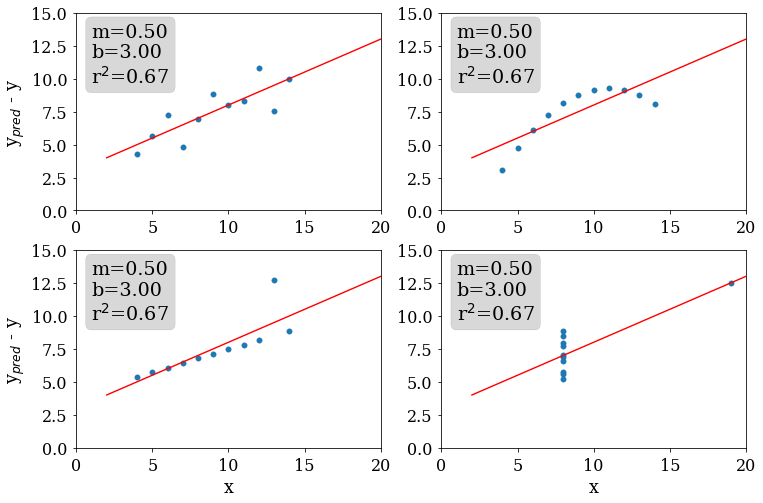

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
props = dict(boxstyle='round', facecolor='grey', alpha=0.3)
for i, (j, k) in enumerate(product(range(2), range(2))):
    axes[j, k].scatter(x[i], y[i])
    m, b, r_value, p_value, std_err = stats.linregress(x[i], y[i])
    axes[j, k].set_xlim([0, 20])
    axes[j, k].set_ylim([0, 15])
    axes[j, k].plot(x_fine, m*x_fine + b, color='r')
    textstr = 'm={:.2f}\nb={:.2f}\nr$^2$={:.2f}'.format(m, b, r_value**2)
    axes[j, k].text(0.05, 0.95, textstr, transform=axes[j, k].transAxes,
                    verticalalignment='top', bbox=props)
    if k == 0:
        axes[j, k].set_ylabel('y$_{pred}$ - y')
    if j == 1:
        axes[j, k].set_xlabel('x')

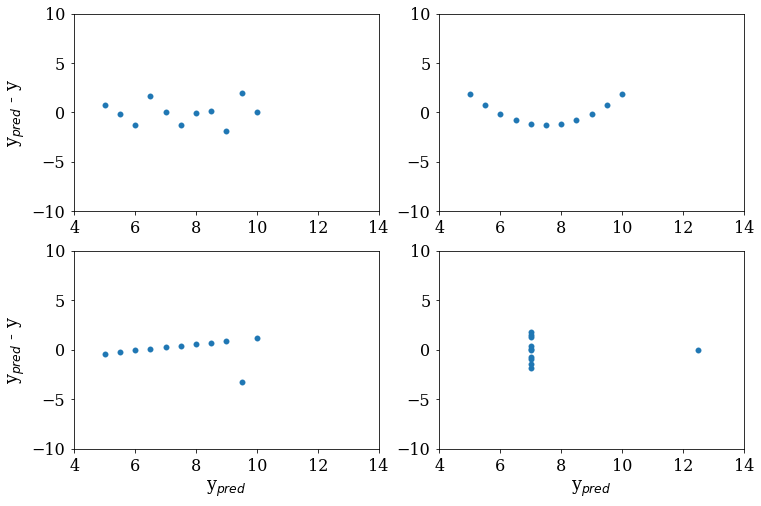

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, (j, k) in enumerate(product(range(2), range(2))):
    m, b, r_value, p_value, std_err = stats.linregress(x[i], y[i])
    axes[j, k].scatter((m*x[i] + b), (m*x[i] + b)-y[i])
    axes[j, k].set_xlim([4, 14])
    axes[j, k].set_ylim([-10, 10])
    if k == 0:
        axes[j, k].set_ylabel('y$_{pred}$ - y')
    if j == 1:
        axes[j, k].set_xlabel('y$_{pred}$')